<a href="https://colab.research.google.com/github/komolcia/SEA_EU/blob/main/1_pun_detectionEN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
pip install openai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.1/70.1 KB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 15.4 MB/s eta 0:00:00


In [23]:
from sklearn.metrics import accuracy_score, f1_score, precision_score,recall_score
from random import randint
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB,BernoulliNB,CategoricalNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import numpy as np
import pandas as pd
import openai
import os
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix,mean_squared_error, r2_score,classification_report
import pandas as pd
import torch
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
import re
from mlxtend.plotting import plot_learning_curves
from sklearn.ensemble import RandomForestClassifier
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import linear_model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder 
from sklearn.linear_model import RidgeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [24]:
data_train = pd.read_json("/content/joker_detection_EN_train.json")
location_train=pd.read_json("/content/joker_location_EN_train.json")
data_train=data_train.merge(location_train,how='outer')
y=[]
for x in data_train['wordplay']:
    if x =="no":
        y.append(False)
    else:
        y.append(True)
data_train['pun_label']=y
data_train

,id,text,wordplay,location,pun_label
0,en_135,Cleopatra was the Pharaohs one of all.,yes,Pharaohs,True
1,en_226,At a flower show the first prize is often a bl...,yes,bloom,True
2,en_7264,Scaldophobia: Fear the toilet will flush while...,no,NaN,False
3,en_6306,The high school music teacher was quite contro...,no,NaN,False
4,en_2186,"I can do an excellent impression of Sinatra, s...",yes,frank,True
...,...,...,...,...,...
5288,en_4047,He that hath a head of wax must not walk in th...,no,NaN,False
5289,en_2434,"''This food tastes of plutonium,'' said Tom ex...",no,NaN,False
5290,en_686,Those who live by the sword... kill those who ...,no,NaN,False
5291,en_950,The landscaper thought gardening magazines wer...,yes,leaf,True


In [25]:
data_test=pd.read_json("/content/joker_detection_EN_test.json")
location_test=pd.read_json("/content/joker_location_EN_test.json")
data_test=data_test.merge(location_test)
data_test

,id,text
0,en_7608,"When they bought a water bed, the couple start..."
1,en_661,"OLD BREAD MEN never die, they just lose their ..."
2,en_5607,"She was only a Fruit vendor's daughter, but, m..."
3,en_6157,"He crashed through several windows, but felt n..."
4,en_2572,Corn is so versatile that it is an a-maize-ing...
...,...,...
3515,en_5320,My dog swallowed my engagement ring. I ended u...
3516,en_4385,Did you hear about the vampire who used to tor...
3517,en_2372,For class schedules Yoga instructors are flexi...
3518,en_2787,Sin and bear it


In [26]:
import nltk
nltk.download('punkt')
nltk_tokens=[]
a=[]
b=[]
istrue=False
c=[]
for x in data_train.text:
    import nltk
    nltk_tokens.append(nltk.word_tokenize(x))
print(nltk_tokens)
for y in range(0,len(nltk_tokens)):
    for x in range(0,len(nltk_tokens[y])):
        if(nltk_tokens[y][x]== data_train['location'][y] and istrue==False):
            c.append(x)
            istrue=True
        a.append(x)
    if(istrue==False):
        c.append(-1)
    b.append(a)
    istrue=False
    a=[]
data_train["the_indexes"]=b
data_train["index"]=c
X=b
y=x
data_train
X=data_train["index"].values.astype("int").reshape(-1, 1)
y = data_train["pun_label"].values 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[['Cleopatra', 'was', 'the', 'Pharaohs', 'one', 'of', 'all', '.'], ['At', 'a', 'flower', 'show', 'the', 'first', 'prize', 'is', 'often', 'a', 'bloom', 'ribbon', '.'], ['Scaldophobia', ':', 'Fear', 'the', 'toilet', 'will', 'flush', 'while', 'showering', '.'], ['The', 'high', 'school', 'music', 'teacher', 'was', 'quite', 'controversial', '.', 'He', 'told', 'his', 'students', 'to', 'read', 'prohibited', 'books', '.'], ['I', 'can', 'do', 'an', 'excellent', 'impression', 'of', 'Sinatra', ',', 'said', 'Tom', ',', 'being', 'perfectly', 'frank', '.'], ['Why', 'do', 'people', 'preserve', 'fruits', 'and', 'vegetables', '?', 'Because', 'they', "'can", "'", '.'], ['Strike', 'while', 'the', 'iron', 'is', 'hot', '.'], ['How', 'does', 'a', 'Welsh', 'man', 'eat', 'cheese', '?', 'Carefully', '.'], ['Adam', 'ate', 'the', 'apple', ',', 'and', 'our', 'teeth', 'still', 'ache', '.'], ['OLD', 'LANDSCAPERS', 'never', 'die', ',', 'they', 'just', 'get', 'weeded', 'out', '.'], ['Fools', 'rush', 'in', 'where', 'a

In [27]:
data_train

,id,text,wordplay,location,pun_label,the_indexes,index
0,en_135,Cleopatra was the Pharaohs one of all.,yes,Pharaohs,True,"[0, 1, 2, 3, 4, 5, 6, 7]",3
1,en_226,At a flower show the first prize is often a bl...,yes,bloom,True,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",10
2,en_7264,Scaldophobia: Fear the toilet will flush while...,no,NaN,False,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]",-1
3,en_6306,The high school music teacher was quite contro...,no,NaN,False,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",-1
4,en_2186,"I can do an excellent impression of Sinatra, s...",yes,frank,True,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",14
...,...,...,...,...,...,...,...
5288,en_4047,He that hath a head of wax must not walk in th...,no,NaN,False,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]",-1
5289,en_2434,"''This food tastes of plutonium,'' said Tom ex...",no,NaN,False,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]",-1
5290,en_686,Those who live by the sword... kill those who ...,no,NaN,False,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",-1
5291,en_950,The landscaper thought gardening magazines wer...,yes,leaf,True,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]",8


Classes:  [False  True]

*--------------------------------------------------*

Score:  0.9678942398489141

*--------------------------------------------------*

Training set score: 0.9549
Test set score: 0.9679

*--------------------------------------------------*

              precision    recall  f1-score   support

       False       0.93      1.00      0.97       471
        True       1.00      0.94      0.97       588

    accuracy                           0.97      1059
   macro avg       0.97      0.97      0.97      1059
weighted avg       0.97      0.97      0.97      1059


*--------------------------------------------------*



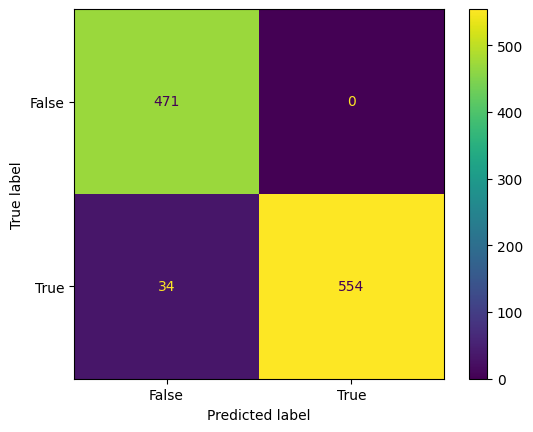

In [32]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=7)
#X_train, y_train = train.drop("target"), train["target"]
#X_test, y_test = test.drop("target"), test["target"]
clf=RandomForestClassifier()
clf.fit(X_train, y_train)
pred_labels=clf.predict(X_test)
print("Classes: ",clf.classes_)
score=clf.score(X_test,y_test)
print("\n*--------------------------------------------------*\n")
print("Score: ",score)
print("\n*--------------------------------------------------*\n")
print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))
print("\n*--------------------------------------------------*\n")
print( classification_report(y_test,pred_labels))
print("\n*--------------------------------------------------*\n")
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()

plt.show()
#openai.api_key = ""
def simpleMyPrompt(prompt,input):

  response = openai.Completion.create(
  model="text-davinci-003",
  prompt=prompt,
  temperature=0.7,
  max_tokens=256,
  top_p=1,
  frequency_penalty=0,
  presence_penalty=0
)
  return response
#prompt = "Find the location of the pun"
#data_test['location_gpt3_my_full']=data_test['text'].apply(lambda x:simpleMyPrompt(prompt,x))
#data_test['location_gpt3_my']=data_test['location_gpt3_my_full'].str['choices'].str[0].str['text'].str.strip()
#data_test['location']=data_test['location_gpt3_my'].str.split('\n')
#data_test['location']

In [33]:
def naive_Bayes(X,y,typ):
    X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=7)
    model=typ
    clf=model.fit(X_train,y_train)
    pred_labels=model.predict(X_test)
    print("Classes: ",clf.classes_)
    print("\n*--------------------------------------------------*\n")
    if str(typ)=='GaussianNB()':
        print("Class Priors: ", clf.class_prior_)
    else:
        print("Class Priors: ", clf.class_log_prior_)
    score=model.score(X_test,y_test)
    print("\n*--------------------------------------------------*\n")
    print("Score: ",score)
    print("\n*--------------------------------------------------*\n")
    print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))
    print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))
    print("\n*--------------------------------------------------*\n")
    print( classification_report(y_test,pred_labels))
    print("\n*--------------------------------------------------*\n")
    print( classification_report(y_test,pred_labels))
    print("\n*--------------------------------------------------*\n")
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
    disp.plot()

    plt.show()
    return X_train,X_test,y_train,y_test,clf,pred_labels

Classes:  [False  True]

*--------------------------------------------------*

Class Priors:  [0.41048654 0.58951346]

*--------------------------------------------------*

Score:  0.9678942398489141

*--------------------------------------------------*

Training set score: 0.9549
Test set score: 0.9679

*--------------------------------------------------*

              precision    recall  f1-score   support

       False       0.93      1.00      0.97       471
        True       1.00      0.94      0.97       588

    accuracy                           0.97      1059
   macro avg       0.97      0.97      0.97      1059
weighted avg       0.97      0.97      0.97      1059


*--------------------------------------------------*

              precision    recall  f1-score   support

       False       0.93      1.00      0.97       471
        True       1.00      0.94      0.97       588

    accuracy                           0.97      1059
   macro avg       0.97      0.97      0

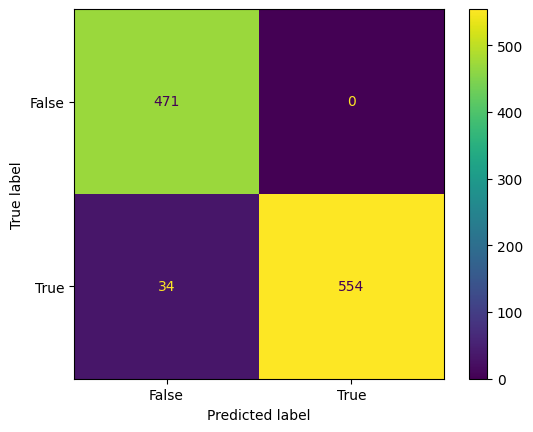

In [34]:
X_train,X_test,y_train,y_test,clf,pred_labels,=naive_Bayes(X,y, GaussianNB())


*--------------------------------------------------*

Score:  0.9244570349386213

*--------------------------------------------------*

Training set score: 0.9121
Test set score: 0.9245

*--------------------------------------------------*

              precision    recall  f1-score   support

       False       0.85      1.00      0.92       471
        True       1.00      0.86      0.93       588

    accuracy                           0.92      1059
   macro avg       0.93      0.93      0.92      1059
weighted avg       0.94      0.92      0.92      1059


*--------------------------------------------------*



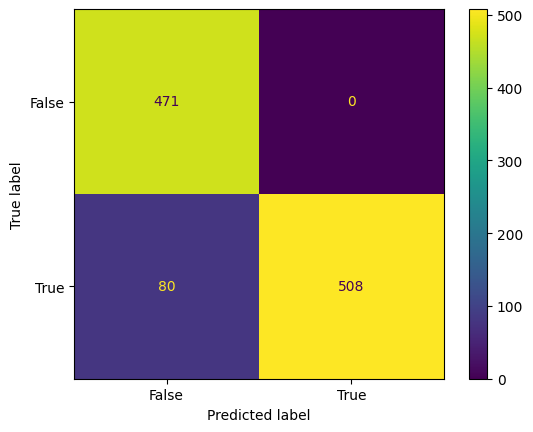

In [35]:
def generic_fun(X,y,typ):
    X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=7)
    model=typ
    clf=model.fit(X_train,y_train)
    score=model.score(X_test,y_test)
    pred_labels=model.predict(X_test)
    print("\n*--------------------------------------------------*\n")
    print("Score: ",score)
    print("\n*--------------------------------------------------*\n")
    print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))
    print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))
    print("\n*--------------------------------------------------*\n")
    print( classification_report(y_test,pred_labels))
    print("\n*--------------------------------------------------*\n")
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
      
    disp.plot()

    plt.show()
    return X_train,X_test,y_train,y_test,clf,pred_labels
X_train,X_test,y_train,y_test,clf,pred_labels,=generic_fun(X,y, RidgeClassifier() )


[[-0.8766842]
 [-0.8766842]
 [-0.8766842]]
Percent:  0.9596977329974811
Training set score: 0.9565
Test set score: 0.9597

*--------------------------------------------------*

              precision    recall  f1-score   support

       False       0.91      1.00      0.95       667
        True       1.00      0.93      0.96       921

    accuracy                           0.96      1588
   macro avg       0.96      0.97      0.96      1588
weighted avg       0.96      0.96      0.96      1588


*--------------------------------------------------*

              precision    recall  f1-score   support

       False       0.91      1.00      0.95       667
        True       1.00      0.93      0.96       921

    accuracy                           0.96      1588
   macro avg       0.96      0.97      0.96      1588
weighted avg       0.96      0.96      0.96      1588


*--------------------------------------------------*



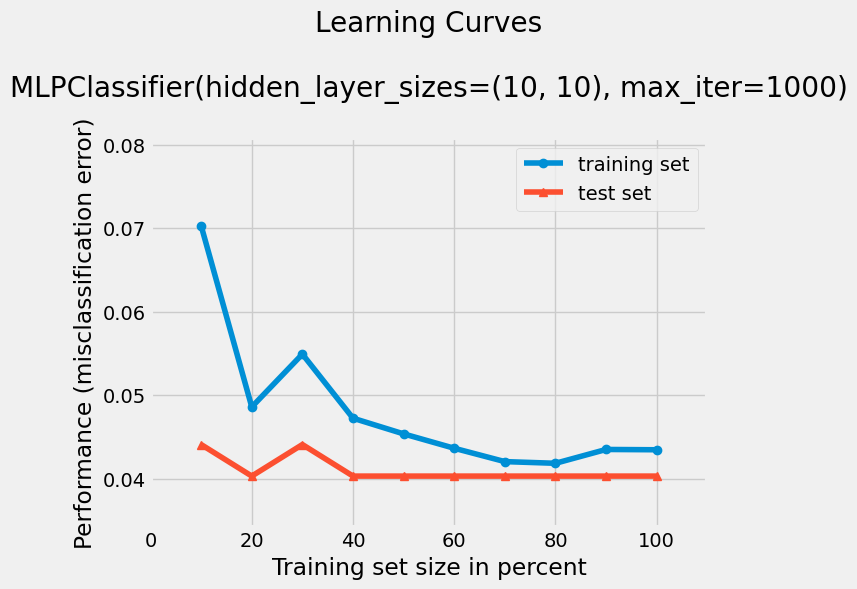

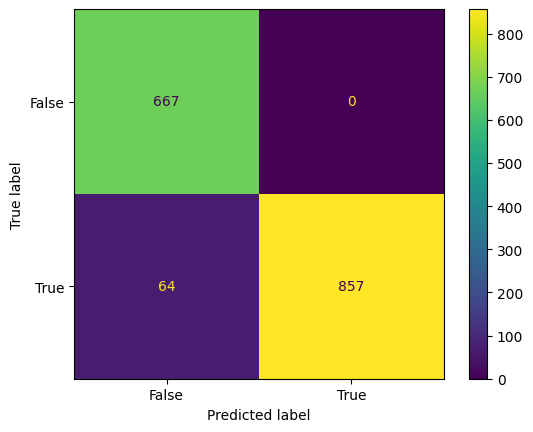

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
def neural_network(hidden_layer_sizes,max_iter,activation,solver,learning_rate,X,y):
    scaler = StandardScaler()

    scaler.fit(X_train)

    train_data = scaler.transform(X_train)
    test_data = scaler.transform(X_test)
    print(train_data[:3])

    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, max_iter=max_iter,
                        activation=activation,
                        solver=solver,
                        learning_rate=learning_rate)

    mlp.fit(train_data, y_train)
    pred_labels=mlp.predict(X_test)
    predictions_train = mlp.predict(train_data)
    predictions_test = mlp.predict(test_data)
    percent = (mlp.score(test_data, y_test))
    print("Percent: ",percent)
    print('Training set score: {:.4f}'.format(mlp.score(train_data, y_train)))
    print('Test set score: {:.4f}'.format(mlp.score(test_data, y_test)))
    print("\n*--------------------------------------------------*\n")
    print( classification_report(y_test,pred_labels))
    print("\n*--------------------------------------------------*\n")
    print( classification_report(y_test,pred_labels))
    print("\n*--------------------------------------------------*\n")
    plot_learning_curves(X_train, y_train, X_test, y_test,mlp)
    y_pred = mlp.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
      
    disp.plot()

    plt.show()
    plt.show()
    return ["Neural Network", percent, mlp]
r=neural_network((10, 10),1000,'relu','adam','constant',X,y)